In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


In [147]:
df = pd.read_csv(r"C:\Users\ayush\Desktop\ML_projects\project 2\Dataset\Iris.csv")

In [149]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,137,6.3,3.4,5.6,2.4,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
43,44,5.0,3.5,1.6,0.6,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor


In [151]:
df = df.drop('Id', axis=1)

In [153]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
11,4.8,3.4,1.6,0.2,Iris-setosa
124,6.7,3.3,5.7,2.1,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [155]:
df.shape

(150, 5)

In [157]:
# Check if any missing values exist in the DataFrame if yes then true if not then false 

print(df.isnull().values.any())

False


In [159]:
# Shows total number of missing values in each column

print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [97]:
# check which flower is there in label 

df.loc[114, 'Species']

'Iris-virginica'

# Train test Split

In [163]:
X_train , X_test , y_train , y_test = train_test_split(
    df.drop('Species' , axis = 1 ) , 
    df['Species'] , 
    test_size = 0.2 ,
    random_state = 0
)

In [165]:
X_train.shape , X_test.shape 

((120, 4), (30, 4))

# PCA 

In [168]:
# mean center the data

scaler = StandardScaler()

scaler.fit( X_train ) 

X_train = scaler.transform( X_train ) 
X_test = scaler.transform( X_test )

In [170]:
pca = PCA( n_components = 2 )

pca.fit( X_train )

X_train_trf = pca.transform( X_train )
X_test_trf = pca.transform( X_test )


In [172]:
X_train_trf.shape

(120, 2)

In [174]:
knn = KNeighborsClassifier()

knn.fit( X_train_trf , y_train )

y_pred = knn.predict(X_test_trf)

print( accuracy_score( y_test , y_pred ) )

0.9333333333333333


In [176]:
pca.explained_variance_

array([2.91333895, 0.96705055])

In [178]:
pca.explained_variance_.shape

(2,)

In [180]:
pca.components_

array([[ 0.52843794, -0.23201227,  0.58394827,  0.5709011 ],
       [ 0.3554837 ,  0.93369239,  0.00795684,  0.04226763]])

In [182]:
pca.components_.shape

(2, 4)

In [184]:
pca.explained_variance_ratio_

array([0.72226528, 0.23974795])

In [186]:
import numpy as np

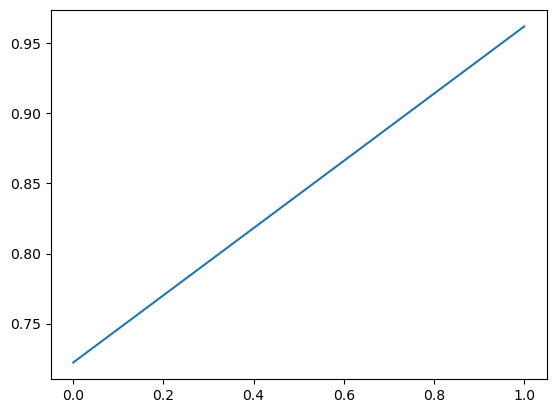

In [190]:
plt.plot( np.cumsum( pca.explained_variance_ratio_ ) ) 
plt.show()

In [199]:
from sklearn.pipeline import Pipeline
import joblib

In [201]:

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier())
])

In [203]:
# Fit pipeline on full dataset (or training data)
pipe.fit(df.drop('Species', axis=1), df['Species'])

# Save pipeline for later use in Flask app
joblib.dump(pipe, 'iris_pipeline.pkl')

['iris_pipeline.pkl']